### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">🚕 Прогнозирование заказов такси</p>

<a id="1.2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Содержание</div>

<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li>
    <li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li>
    <li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li>
    <li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li>
     <li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Создание признаков</a></span></li>
    <li><span><a href="#Подготовим-выборки-для-обучения-моделей" data-toc-modified-id="Подготовим-выборки-для-обучения-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Подготовим выборки для обучения моделей</a></span></li>
    <li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Обучение моделей</a></span></li>
    <li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Сравнение моделей</a></span></li>
    <li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Тестирование моделей</a></span></li>
    <li><span><a href="#Сравнение-моделей-на-тестовой-выборке" data-toc-modified-id="Сравнение-моделей-на-тестовой-выборке-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Сравнение моделей на тестовой выборке</a></span></li>
    <li><span><a href="#Вывод" data-toc-modified-id="Вывод-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Вывод</a></span></li>

<a id="Описание-данных"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Описание данных</div>

<ul>
<li>num_orders — количество заказов</li>
</ul>


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">


Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. 

</div>

<a id="Загрузка-библиотек"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Загрузка библиотек</div>

In [1]:
import os
import time
import warnings
import pandas as pd
import numpy as np
import catboost as cb
import lightgbm as lgmb
import matplotlib.pyplot as plt 
from sklearn import tree, metrics
from tabulate import tabulate
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.tsa.stattools import adfuller
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import GridSearchCV, train_test_split

<a id="EDA"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> EDA</div>

In [2]:
pth1 = '/datasets/taxi.csv'
pth2 = 'taxi.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1, index_col=[0], parse_dates=[0])
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, index_col=[0], parse_dates=[0])
else:
    print('Something is wrong')

In [3]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    В данных отсутствуют пропуски.  

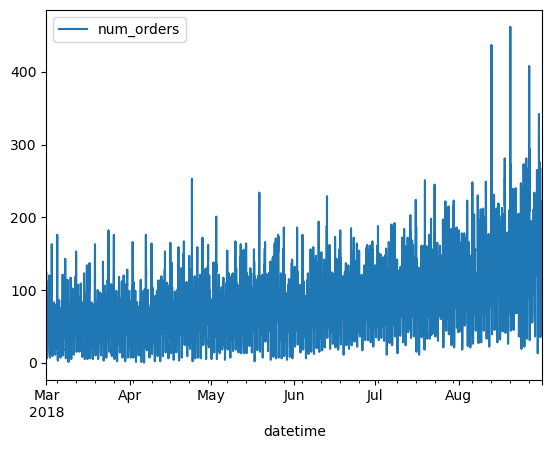

In [5]:
#ресемеплирование по одному часу
data.sort_index(inplace=True)
data = data.resample('1H').sum()
data.plot();

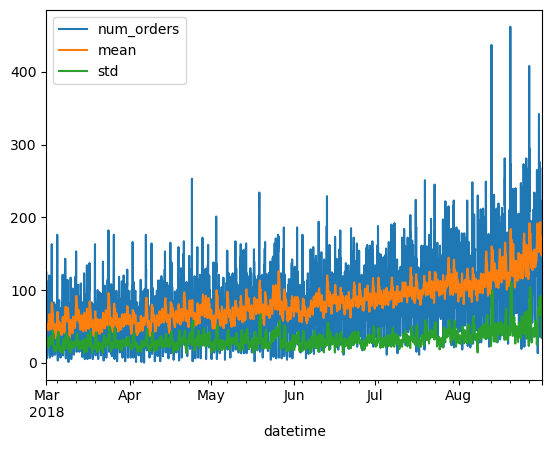

In [6]:
data['mean'] = data['num_orders'].rolling(15).mean()
data['std'] = data['num_orders'].rolling(15).std()
data.plot();

In [7]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    Проверим, является ли временной ряд стационарным, выполним расширенный тест Дики-Фуллера, в котором используются следующие нулевая и альтернативная гипотезы:
<br>H0: Временной ряд является нестационарным. Другими словами, он имеет некоторую структуру, зависящую от времени, и не имеет постоянной дисперсии во времени.
<br>H1: Временной ряд является стационарным.

In [8]:
p_value = adfuller(data['num_orders'])[1]
print('p =', p_value)
if p_value < 0.05:
    print('Нулевая гипотеза отвергается. Ряд стационарен по расширеннему тесту Дики-Фуллера')
else:
    print('Нулевая гипотеза не отвергается. Ряд нестационарен по расширеннему тесту Дики-Фуллера')


p = 0.028940051402613316
Нулевая гипотеза отвергается. Ряд стационарен по расширеннему тесту Дики-Фуллера


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Вывод</b>
<br>В данных не обнаружены пропуски. Проведено ресемеплирование по одному часу. Временной ряд стационарен.
</div>

<a id="Анализ-данных"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Анализ данных</div>

In [9]:
data = data.drop(columns=['mean', 'std'])

In [10]:
decomposed = seasonal_decompose(data)

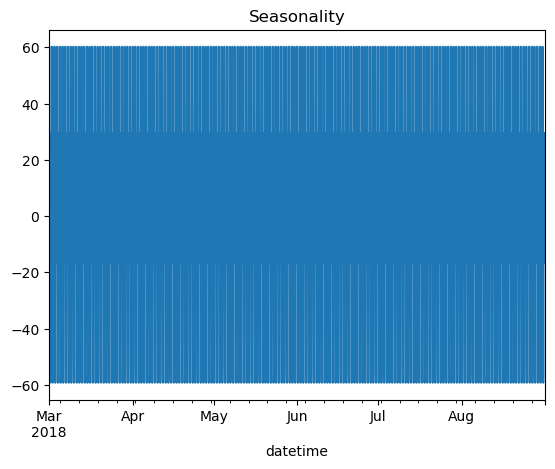

In [11]:
decomposed.seasonal.plot(ax=plt.gca(), title='Seasonality');


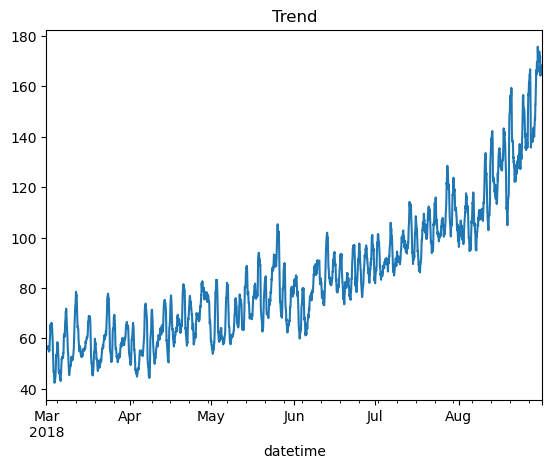

In [12]:
decomposed.trend.plot(ax=plt.gca(), title='Trend');

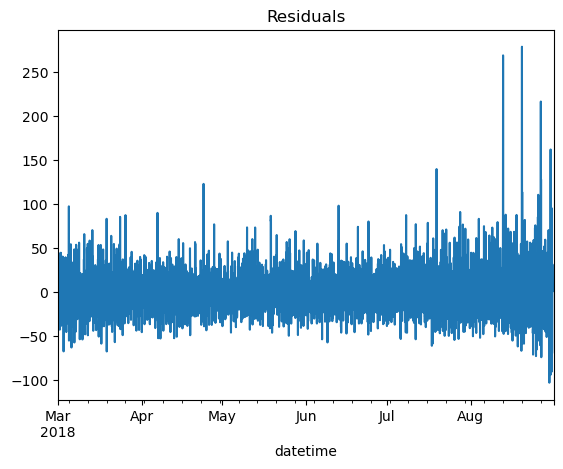

In [13]:
decomposed.resid.plot(ax=plt.gca(), title='Residuals');

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Вывод</b>
        <ul>
<li>Данные разложены на три составляющие: сезонность, тренд и остаток.</li>
<li>Трэнд показывает линейный рост количества заказов со временем.</li> 

</ul>
</div> 

<a id="Создание-признаков"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Создание признаков</div>

In [14]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data

In [15]:
data = make_features(data, 90, 40)

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Вывод</b>
        <ul>
<li>Созданы календарные признаки, "отстающие значения", скользящее среднее. </li>

</ul>
</div>

<a id="Подготовим-выборки-для-обучения-моделей"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Подготовим выборки для обучения моделей</div>

In [16]:
train, test_1 = train_test_split(data, shuffle=False, test_size=0.2, random_state=42)
valid, test = train_test_split(test_1, shuffle=False, test_size=0.5, random_state=42)
train = train.dropna()
X_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']
X_valid = valid.drop('num_orders', axis=1)
y_valid = valid['num_orders']
X_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']

In [17]:
print(f"Размер обучающей выборки: {X_train.shape}")

print(f"Размер валидационной выборки: {X_valid.shape}")

print(f"Размер тестовой  выборки: {X_test.shape}")

Размер обучающей выборки: (3442, 95)
Размер валидационной выборки: (442, 95)
Размер тестовой  выборки: (442, 95)


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Вывод</b>
        <ul>
<li>Данные разделены на обучающую, валидационную и тестовую выборки.</li>

</ul>
</div>

<a id="Обучение-моделей"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Обучение моделей</div>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">CatBoost</p>

In [18]:
# parametrs_Cat = {'depth': [4,7,10],
#                  'learning_rate': [0.03, 0.1, 0.15],
#                  'iterations': [100, 200, 300]
#               }

# cb = cb.CatBoostRegressor(random_state=12345);

# grid_search = GridSearchCV(cb, 
#                            parametrs_Cat, 
#                            cv = 3,  
#                            n_jobs=-1);

# grid_search.fit(X_train, y_train);

In [19]:
#grid_search.best_params_

In [20]:
#pred = grid_search.best_estimator_.predict(X_valid)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    Для экономии времени будем использовать лучшие гиперпараметры.

In [21]:
cb = CatBoostRegressor(random_state=12345, depth=7, learning_rate=0.15, iterations=300);
cb.fit(X_train, y_train);
pred = cb.predict(X_valid)

0:	learn: 33.1564915	total: 70.1ms	remaining: 21s
1:	learn: 31.0461150	total: 75.2ms	remaining: 11.2s
2:	learn: 29.3397153	total: 79.8ms	remaining: 7.9s
3:	learn: 27.9243785	total: 84.2ms	remaining: 6.23s
4:	learn: 26.6289343	total: 89ms	remaining: 5.25s
5:	learn: 25.6622744	total: 94.7ms	remaining: 4.64s
6:	learn: 24.7701407	total: 99.6ms	remaining: 4.17s
7:	learn: 23.9862857	total: 104ms	remaining: 3.81s
8:	learn: 23.3556070	total: 109ms	remaining: 3.53s
9:	learn: 22.8882833	total: 114ms	remaining: 3.31s
10:	learn: 22.4976974	total: 119ms	remaining: 3.12s
11:	learn: 22.1457198	total: 123ms	remaining: 2.95s
12:	learn: 21.8779768	total: 127ms	remaining: 2.81s
13:	learn: 21.5761496	total: 132ms	remaining: 2.69s
14:	learn: 21.3830750	total: 136ms	remaining: 2.59s
15:	learn: 21.2033154	total: 141ms	remaining: 2.51s
16:	learn: 20.9573345	total: 146ms	remaining: 2.43s
17:	learn: 20.7675651	total: 151ms	remaining: 2.37s
18:	learn: 20.6369678	total: 156ms	remaining: 2.3s
19:	learn: 20.4657927

167:	learn: 11.3242298	total: 867ms	remaining: 681ms
168:	learn: 11.2388921	total: 873ms	remaining: 677ms
169:	learn: 11.2047314	total: 878ms	remaining: 671ms
170:	learn: 11.1816426	total: 883ms	remaining: 666ms
171:	learn: 11.1330897	total: 887ms	remaining: 660ms
172:	learn: 11.1302753	total: 891ms	remaining: 654ms
173:	learn: 11.0881715	total: 896ms	remaining: 649ms
174:	learn: 11.0703678	total: 901ms	remaining: 644ms
175:	learn: 11.0250445	total: 906ms	remaining: 638ms
176:	learn: 11.0223527	total: 910ms	remaining: 632ms
177:	learn: 10.9834065	total: 915ms	remaining: 627ms
178:	learn: 10.9462131	total: 919ms	remaining: 621ms
179:	learn: 10.9165121	total: 923ms	remaining: 616ms
180:	learn: 10.8739130	total: 928ms	remaining: 610ms
181:	learn: 10.8417163	total: 932ms	remaining: 604ms
182:	learn: 10.8087755	total: 937ms	remaining: 599ms
183:	learn: 10.7549454	total: 942ms	remaining: 594ms
184:	learn: 10.7188996	total: 946ms	remaining: 588ms
185:	learn: 10.6749174	total: 951ms	remaining:

In [22]:
mse_cat = mean_squared_error(y_valid, pred)
rmse_cat = (mse_cat) ** 0.5
print('RMSE для CatBoost модели на валидационной выборке: ',rmse_cat)

RMSE для CatBoost модели на валидационной выборке:  31.147847699749775


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">XGBoost</p>

In [23]:
xgb = XGBRegressor(random_state=12345, learning_rate=0.1, max_depth=35)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=35, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=12345, ...)

In [24]:
preds_xgb= xgb.predict(X_valid)

In [25]:
mse_xgb = mean_squared_error(y_valid, preds_xgb)
rmse_xgb = mse_xgb** 0.5
print('RMSE для XGBoost модели на валидационной выборке: ', rmse_xgb)

RMSE для XGBoost модели на валидационной выборке:  34.56975824042725


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">LightGBM</p>

In [26]:
param_light = {'learning_rate': [0.1, 0.3, 0.5, 0.7],
               'max_depth': [15, 20, 30, 35],
              }

lgbm = LGBMRegressor(random_state = 12345)

#инициализируем GridSearchCV
grid_search = GridSearchCV(estimator = lgbm, 
                            param_grid = param_light, 
                            cv = 3,
                            n_jobs = -1
                           );
grid_search.fit(X_train, y_train);

In [27]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 15}

In [28]:
preds_lgbm = grid_search.best_estimator_.predict(X_valid)

In [29]:
mse_lgbm = mean_squared_error(y_valid, preds_lgbm)
rmse_lgbm = mse_lgbm** 0.5
print('RMSE для LightGBM модели на валидационной выборке: ', rmse_lgbm)

RMSE для LightGBM модели на валидационной выборке:  30.910914961990674


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">DecisionTree</p>

In [30]:
parametrs_DT = {'max_depth': [35, 80]}

DT = DecisionTreeRegressor(random_state=12345)

#инициализируем GridSearchCV
grid_search = GridSearchCV(DT, 
                             parametrs_DT, 
                             scoring='neg_mean_squared_error', 
                             cv=2
                            )
grid_search.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': [35, 80]},
             scoring='neg_mean_squared_error')

In [31]:
grid_search.best_params_

{'max_depth': 35}

In [32]:
preds_DT = grid_search.best_estimator_.predict(X_valid)

In [33]:
mse_DT = mean_squared_error(y_valid, preds_DT)
rmse_DT = (mse_DT) ** 0.5
print('RMSE для Decision Tree модели на валидационной выборке: ',rmse_DT)

RMSE для Decision Tree модели на валидационной выборке:  45.41468058535349


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">RandomForest</p>

In [34]:
# parametrs_RF = {'max_depth': [35, 80],
#                'n_estimators': [80, 100]}

# RF = RandomForestRegressor(random_state=12345)

# #инициализируем GridSearchCV
# grid_search = GridSearchCV(RF, 
#                              parametrs_RF, 
#                              scoring='neg_mean_squared_error', 
#                              cv=2
#                             )
# grid_search.fit(X_train, y_train)


In [35]:
# grid_search.best_params_

In [36]:
# preds_RF = grid_search.best_estimator_.predict(X_valid)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    Для экономии времени будем использовать лучшие гиперпараметры.

In [37]:
RF = RandomForestRegressor(random_state=12345, max_depth=35, n_estimators=80)
RF.fit(X_train, y_train)
preds_RF = RF.predict(X_valid)

In [38]:
mse_RF = mean_squared_error(y_valid, preds_RF)
rmse_RF = (mse_RF) ** 0.5
print('RMSE для Random Forest модели на валидационной выборке: ',rmse_RF)

RMSE для Random Forest модели на валидационной выборке:  31.984818850164338


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">LinearRegression</p>

In [39]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [40]:
pred_LR = LR.predict(X_valid)

In [41]:
mse_LR = mean_squared_error(y_valid, pred_LR)
rmse_LR = (mse_LR) ** 0.5
print('RMSE для Linear Regresion модели на валидационной выборке: ', rmse_LR)

RMSE для Linear Regresion модели на валидационной выборке:  30.846018339970367


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Lasso Regression</p>

In [42]:
lasso_model = Lasso(alpha=1.0)
lasso=lasso_model.fit(X_train , y_train)

In [43]:
lasso_predict = lasso.predict(X_valid)

In [44]:
mse_lasso = mean_squared_error(y_valid, lasso_predict)
rmse_lasso = (mse_lasso) ** 0.5
print('RMSE для Lasso Regresion модели на валидационной выборке: ', rmse_lasso)

RMSE для Lasso Regresion модели на валидационной выборке:  30.633219092969373


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Ridge Regression</p>

In [45]:
ridge_model = Ridge(alpha=1.0)
ridge=ridge_model.fit(X_train , y_train)

In [46]:
ridge_predict = ridge.predict(X_valid)

In [47]:
mse_ridge = mean_squared_error(y_valid, ridge_predict)
rmse_ridge = (mse_ridge) ** 0.5
print('RMSE для Ridge Regresion модели на валидационной выборке: ', rmse_ridge)

RMSE для Ridge Regresion модели на валидационной выборке:  30.844578716983463


<a id="Сравнение-моделей"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Сравнение моделей</div>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Oценка качества моделей с помощью метрики RMSE</p>

In [48]:
data_RMSE={'Models':['XGBoost','LightGBM','CatBoost', 'Decision Tree', 'Random Forest','Linear Regresion', 'Lasso Regresion','Ridge Regresion'],
      'RMSE': [rmse_xgb, rmse_lgbm, rmse_cat, rmse_DT, rmse_RF, rmse_LR, rmse_lasso, rmse_ridge]}
df_RMSE=pd.DataFrame(data_RMSE)
print(tabulate(df_RMSE, headers='keys', tablefmt='psql'))

+----+------------------+---------+
|    | Models           |    RMSE |
|----+------------------+---------|
|  0 | XGBoost          | 34.5698 |
|  1 | LightGBM         | 30.9109 |
|  2 | CatBoost         | 31.1478 |
|  3 | Decision Tree    | 45.4147 |
|  4 | Random Forest    | 31.9848 |
|  5 | Linear Regresion | 30.846  |
|  6 | Lasso Regresion  | 30.6332 |
|  7 | Ridge Regresion  | 30.8446 |
+----+------------------+---------+


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Вывод</b>
        <ul>
<li>Из исследований следует вывод, что самая высокое RMSE у Decision Tree при тестировании на валидационной выборке. </li>   
<li>XGBoost, Random Forest, LightGBM, CatBoost, Linear Regresion, Lasso Regresion, Ridge Regresion показали хорошие результаты, т.к. их метрика была меньше 48. Протестируем модели на тестовой выборке.</li>
</ul>
</div>

<a id="Тестирование-моделей"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Тестирование моделей</div>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">CatBoost</p>

In [49]:
cb = CatBoostRegressor(random_state=12345, depth = 7,  iterations = 300, learning_rate = 0.15);

cb.fit(X_train, y_train);

preds_final_cat = cb.predict(X_test)

0:	learn: 33.1564915	total: 15.6ms	remaining: 4.67s
1:	learn: 31.0461150	total: 21.9ms	remaining: 3.26s
2:	learn: 29.3397153	total: 27.6ms	remaining: 2.73s
3:	learn: 27.9243785	total: 32.8ms	remaining: 2.42s
4:	learn: 26.6289343	total: 38.1ms	remaining: 2.25s
5:	learn: 25.6622744	total: 42.8ms	remaining: 2.1s
6:	learn: 24.7701407	total: 48.4ms	remaining: 2.03s
7:	learn: 23.9862857	total: 53.9ms	remaining: 1.97s
8:	learn: 23.3556070	total: 59.6ms	remaining: 1.93s
9:	learn: 22.8882833	total: 64.9ms	remaining: 1.88s
10:	learn: 22.4976974	total: 70.6ms	remaining: 1.85s
11:	learn: 22.1457198	total: 77.1ms	remaining: 1.85s
12:	learn: 21.8779768	total: 82.2ms	remaining: 1.81s
13:	learn: 21.5761496	total: 88ms	remaining: 1.8s
14:	learn: 21.3830750	total: 93.8ms	remaining: 1.78s
15:	learn: 21.2033154	total: 99.5ms	remaining: 1.76s
16:	learn: 20.9573345	total: 105ms	remaining: 1.74s
17:	learn: 20.7675651	total: 111ms	remaining: 1.73s
18:	learn: 20.6369678	total: 116ms	remaining: 1.71s
19:	learn:

165:	learn: 11.3694216	total: 866ms	remaining: 699ms
166:	learn: 11.3650297	total: 871ms	remaining: 693ms
167:	learn: 11.3242298	total: 876ms	remaining: 688ms
168:	learn: 11.2388921	total: 881ms	remaining: 683ms
169:	learn: 11.2047314	total: 886ms	remaining: 677ms
170:	learn: 11.1816426	total: 890ms	remaining: 671ms
171:	learn: 11.1330897	total: 896ms	remaining: 667ms
172:	learn: 11.1302753	total: 900ms	remaining: 661ms
173:	learn: 11.0881715	total: 905ms	remaining: 655ms
174:	learn: 11.0703678	total: 909ms	remaining: 649ms
175:	learn: 11.0250445	total: 913ms	remaining: 643ms
176:	learn: 11.0223527	total: 918ms	remaining: 638ms
177:	learn: 10.9834065	total: 924ms	remaining: 633ms
178:	learn: 10.9462131	total: 931ms	remaining: 629ms
179:	learn: 10.9165121	total: 935ms	remaining: 624ms
180:	learn: 10.8739130	total: 941ms	remaining: 618ms
181:	learn: 10.8417163	total: 945ms	remaining: 613ms
182:	learn: 10.8087755	total: 949ms	remaining: 607ms
183:	learn: 10.7549454	total: 954ms	remaining:

In [50]:
mse_final_cat = mean_squared_error(y_test, preds_final_cat)
rmse_final_cat = (mse_final_cat) ** 0.5
print('RMSE на тестовой выборке: ', rmse_final_cat)

RMSE на тестовой выборке:  48.641734285699464


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">XGBoost</p>

In [51]:
xgb = XGBRegressor(random_state=12345, learning_rate=0.1, max_depth=35)
xgb.fit(X_train, y_train)
preds_final_xgb = cb.predict(X_test)

In [52]:
mse_final_xgb = mean_squared_error(y_test, preds_final_xgb)
rmse_final_xgb = (mse_final_xgb) ** 0.5
print('RMSE на тестовой выборке: ', rmse_final_xgb)

RMSE на тестовой выборке:  48.641734285699464


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">LightGBM</p>

In [53]:
lgbm = LGBMRegressor(random_state = 12345, learning_rate = 0.1, max_depth=15)

lgbm.fit(X_train, y_train);
preds_final_lgbm = cb.predict(X_test)

In [54]:
mse_final_lgbm = mean_squared_error(y_test, preds_final_lgbm)
rmse_final_lgbm = (mse_final_lgbm) ** 0.5
print('RMSE на тестовой выборке: ', rmse_final_lgbm)

RMSE на тестовой выборке:  48.641734285699464


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">DecisionTree</p>

In [55]:
DT = DecisionTreeRegressor(random_state=12345, max_depth=35)
DT.fit(X_train, y_train);
preds_final_DT= cb.predict(X_test)

In [56]:
mse_final_DT = mean_squared_error(y_test, preds_final_DT)
rmse_final_DT = (mse_final_DT) ** 0.5
print('RMSE на тестовой выборке: ', rmse_final_DT)

RMSE на тестовой выборке:  48.641734285699464


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Random Forest</p>

In [57]:
RF = RandomForestRegressor(random_state=12345, max_depth=35, n_estimators=80)
RF.fit(X_train, y_train)
preds_final_RF = RF.predict(X_test)

In [58]:
mse_final_RF = mean_squared_error(y_test, preds_final_RF)
rmse_final_RF = (mse_final_RF) ** 0.5
print('RMSE на тестовой выборке: ', rmse_final_RF)

RMSE на тестовой выборке:  46.72968167441298


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Linear Regression</p>

In [59]:
LR = LinearRegression()
LR.fit(X_train, y_train)
preds_final_LR = LR.predict(X_test)

In [60]:
mse_final_LR = mean_squared_error(y_test, preds_final_LR)
rmse_final_LR = (mse_final_LR) ** 0.5
print('RMSE на тестовой выборке: ', rmse_final_LR)

RMSE на тестовой выборке:  44.48101302078242


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Lasso Regression</p>

In [61]:
lasso_model = Lasso(alpha=1.0)
lasso=lasso_model.fit(X_train , y_train)

In [62]:
lasso_final_predict = lasso.predict(X_test)

In [63]:
mse_final_lasso = mean_squared_error(y_test, lasso_final_predict)
rmse_final_lasso = (mse_final_lasso) ** 0.5
print('RMSE на тестовой выборкее: ', rmse_final_lasso)

RMSE на тестовой выборкее:  41.25171981856461


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Ridge Regression</p>

In [64]:
ridge_model = Ridge(alpha=1.0)
ridge=ridge_model.fit(X_train , y_train)

In [65]:
ridge_final_predict = ridge.predict(X_test)

In [66]:
mse_final_ridge = mean_squared_error(y_test, ridge_final_predict)
rmse_final_ridge = (mse_final_ridge) ** 0.5
print('RMSE на тестовой выборке: ', rmse_final_ridge)

RMSE на тестовой выборке:  44.469488277738925


<a id="Сравнение-моделей-на-тестовой-выборке"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Сравнение моделей на тестовой выборке</div>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Oценка качества моделей с помощью метрики RMSE</p>

In [67]:
data_RMSE={'Models':['XGBoost','LightGBM','CatBoost', 'Decision Tree', 'Random Forest','Linear Regresion', 'Lasso Regresion','Ridge Regresion'],
      'RMSE': [rmse_final_xgb, rmse_final_lgbm, rmse_final_cat, rmse_final_DT, rmse_final_RF, rmse_final_LR, rmse_final_lasso, rmse_final_ridge]}
df_RMSE=pd.DataFrame(data_RMSE)
print(tabulate(df_RMSE, headers='keys', tablefmt='psql'))

+----+------------------+---------+
|    | Models           |    RMSE |
|----+------------------+---------|
|  0 | XGBoost          | 48.6417 |
|  1 | LightGBM         | 48.6417 |
|  2 | CatBoost         | 48.6417 |
|  3 | Decision Tree    | 48.6417 |
|  4 | Random Forest    | 46.7297 |
|  5 | Linear Regresion | 44.481  |
|  6 | Lasso Regresion  | 41.2517 |
|  7 | Ridge Regresion  | 44.4695 |
+----+------------------+---------+


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Вывод</b>
        <ul>
<li>Из исследований следует вывод, что модель Linear Regresion, Lasso Regresion, Ridge Regresion и Random Forest показали хорошие результаты. Метрика RMSE меньше 48. </li>         
<li>Худшей моделью стали модели градиентного бустинга и Decision Tree.</li>
</ul>
</div>

<a id="Вывод"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Вывод</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<br>📑Было проведено исследование, для<b> прогнозирования заказов такси</b>. 
        
        
<br><b> Входные данные - исторические данные о заказах такси в аэропортах. </b>

        
<br> 📊 Временной ряд является стационарным. Трэнд показывает линейный рост количества заказов со временем.
        
<br> 📊 Были обучены модели линейной регрессии, случайного леса, дерево решений, XGBoost, CatBoost, LightGBM, лассо-регрессия и гребневая регрессия. 
        
<br> 📊 Найден лучшие гиперпараметры для соотвествующих моделей с помощью GridSearchCV.
        
<br> 📊 Показано сравнение качества исследованных моделей с помощью метрики RMSE на валидационной и тестовой выборках.
 
<br>Исходя из анализа, сделан вывод:
        <br>             <b>- Linear Regresion, Lasso Regresion, Ridge Regresion и Random Forest показали хорошие результаты с метрикой RMSE меньше 48.</b>      
<br>             <b>- худшей моделью стали модели градиентного бустинга и Decision Tree. 